In [1]:
from scipy.io import loadmat
import numpy as np 
import pandas as pd 
from matplotlib import rcParams
import matplotlib.pyplot as plt
import os

In [2]:
#rcParams['axes.titleweight'] = 'bold'
#rcParams["font.weight"] = "bold"
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('font', family='serif')

In [3]:
os.makedirs('fig/', exist_ok=True)

In [4]:
def get_resultCV_parts(foldData):
    data = {}
    keys = ["f1Pos",
            "threshold",
            "transformedThreshold",
            "realConnectionMatrix",
            "predictedConnectionMatrix",
            "resultMatrix",
            "confMatrix",
            "recall",
            "precision",
            "fpr",
            "f1",
            "auc",
            "auprc",
            "time",
            "thresholds",
            "f1Values"]
    for k, d in zip(keys, foldData):
        data[k] = d
    return data

In [5]:
def get_result_parts(foldData):
    data = {}
    keys = ["strategyName",
            "thresholds",
            "tprValues",
            "fprValues",
            "precisionValues",
            "f1Values",
            "confMatrices",
            "auc",
            "auprc",
            "time",
            "resultMatrix",
            "connectionMatrix"]
    for k, d in zip(keys, foldData):
        data[k] = d
    return data

In [6]:
export_folder = '../export_cv/'
datasets = ['neurons', 'expectedLatency', 'connections', 'delay', 'noisy', 'sim1_subset']
dataset_display_names = ['NU', 'LA', 'CO', 'DE', 'NO', 'RAT']
strategies = ['ace_x2', 'ic_20', 'ic_50', 'te_20_2_2', 'te_50_2_2']
display_names = ['ACE', 'IC20', 'IC50', 'HOTE20', 'HOTE50']

In [7]:
data = pd.DataFrame()
for i,(d, ddn) in enumerate(zip(datasets, dataset_display_names)):
    low_data = {}
    high_data = {}
    st_data = {}
    for s, dn in zip(strategies, display_names):
        folderPath = export_folder + s + '/'+ d + '/'
        resultCV_content = loadmat(folderPath + 'resultCV.mat')
        result_content = loadmat(folderPath + 'result.mat')
        resultMeanCV_content = loadmat(folderPath + 'resultCV.mat')
        
        
        lowCV = get_resultCV_parts(resultCV_content['foldData'][0][0])
        highCV = get_resultCV_parts(resultCV_content['foldData'][0][1])
        stCV = get_resultCV_parts(resultCV_content['foldData'][0][2])
        
        low = get_result_parts(result_content['data'][0][0])
        high = get_result_parts(result_content['data'][0][1])
        st = get_result_parts(result_content['data'][0][2])
        
        low_auc = low["auprc"][0][0]
        high_auc = high["auprc"][0][0]
        st_auc = st["auprc"][0][0]
        
        low_data[dn] = low_auc
        high_data[dn] = high_auc
        st_data[dn] = st_auc
        
    if ddn=="NO":
        low_dataframe = pd.DataFrame(low_data, index=[ddn+'_M'])
    else:
        low_dataframe = pd.DataFrame(low_data, index=[ddn+'_L'])
    high_dataframe = pd.DataFrame(high_data, index=[ddn+'_H'])
    st_dataframe = pd.DataFrame(st_data, index=['ST'])
    if i == 0:
        data = data.append(st_dataframe)
    data = data.append(low_dataframe)
    data = data.append(high_dataframe)

In [8]:
data

ACE      IC20      IC50    HOTE20    HOTE50
ST     0.862642  0.202810  0.140918  0.783167  0.776121
NU_L   0.851947  0.083401  0.061642  0.631013  0.618552
NU_H   0.950429  0.258600  0.103751  0.955213  0.955286
LA_L   0.865216  0.021933  0.013832  0.557906  0.554589
LA_H   0.813532  0.250021  0.143040  0.812588  0.811895
CO_L   0.885023  0.265647  0.161966  0.873822  0.873874
CO_H   0.808571  0.040631  0.031650  0.595230  0.589437
DE_L   0.759774  0.277003  0.152817  0.767108  0.767046
DE_H   0.133374  0.168673  0.105308  0.150492  0.366925
NO_M   0.783757  0.224830  0.122463  0.724579  0.722438
NO_H   0.851754  0.224609  0.102092  0.832163  0.830933
RAT_L  0.054864  0.025593  0.040042  0.002496  0.010339
RAT_H  0.054932  0.018923  0.026587  0.002424  0.009834

In [9]:
print(data.to_latex(float_format='%.4f', bold_rows=True))

\begin{tabular}{lrrrrr}
\toprule
{} &    ACE &   IC20 &   IC50 &  HOTE20 &  HOTE50 \\
\midrule
\textbf{ST   } & 0.8626 & 0.2028 & 0.1409 &  0.7832 &  0.7761 \\
\textbf{NU\_L } & 0.8519 & 0.0834 & 0.0616 &  0.6310 &  0.6186 \\
\textbf{NU\_H } & 0.9504 & 0.2586 & 0.1038 &  0.9552 &  0.9553 \\
\textbf{LA\_L } & 0.8652 & 0.0219 & 0.0138 &  0.5579 &  0.5546 \\
\textbf{LA\_H } & 0.8135 & 0.2500 & 0.1430 &  0.8126 &  0.8119 \\
\textbf{CO\_L } & 0.8850 & 0.2656 & 0.1620 &  0.8738 &  0.8739 \\
\textbf{CO\_H } & 0.8086 & 0.0406 & 0.0317 &  0.5952 &  0.5894 \\
\textbf{DE\_L } & 0.7598 & 0.2770 & 0.1528 &  0.7671 &  0.7670 \\
\textbf{DE\_H } & 0.1334 & 0.1687 & 0.1053 &  0.1505 &  0.3669 \\
\textbf{NO\_M } & 0.7838 & 0.2248 & 0.1225 &  0.7246 &  0.7224 \\
\textbf{NO\_H } & 0.8518 & 0.2246 & 0.1021 &  0.8322 &  0.8309 \\
\textbf{RAT\_L} & 0.0549 & 0.0256 & 0.0400 &  0.0025 &  0.0103 \\
\textbf{RAT\_H} & 0.0549 & 0.0189 & 0.0266 &  0.0024 &  0.0098 \\
\bottomrule
\end{tabular}



In [10]:
data = pd.DataFrame()
for i,(d, ddn) in enumerate(zip(datasets, dataset_display_names)):
    low_data = {}
    high_data = {}
    st_data = {}
    for s, dn in zip(strategies, display_names):
        folderPath = export_folder + s + '/'+ d + '/'
        resultCV_content = loadmat(folderPath + 'resultCV.mat')
        result_content = loadmat(folderPath + 'result.mat')
        resultMeanCV_content = loadmat(folderPath + 'resultCV.mat')
        
        
        lowCV = get_resultCV_parts(resultCV_content['foldData'][0][0])
        highCV = get_resultCV_parts(resultCV_content['foldData'][0][1])
        stCV = get_resultCV_parts(resultCV_content['foldData'][0][2])
        
        low = get_result_parts(result_content['data'][0][0])
        high = get_result_parts(result_content['data'][0][1])
        st = get_result_parts(result_content['data'][0][2])
        
        low_auc = low["auprc"][0][0]
        high_auc = high["auprc"][0][0]
        st_auc = st["auprc"][0][0]
        
        low_data[dn] = low_auc
        high_data[dn] = high_auc
        st_data[dn] = st_auc
        
    if ddn=="NO":
        low_dataframe = pd.DataFrame(low_data, index=[ddn+'_M'])
    else:
        low_dataframe = pd.DataFrame(low_data, index=[ddn+'_L'])
    high_dataframe = pd.DataFrame(high_data, index=[ddn+'_H'])
    st_dataframe = pd.DataFrame(st_data, index=['ST'])
    if i == 0:
        data = data.append(st_dataframe)
    data = data.append(low_dataframe)
    data = data.append(high_dataframe)

In [11]:
data.transpose()

ST      NU_L      NU_H      LA_L      LA_H      CO_L      CO_H  \
ACE     0.862642  0.851947  0.950429  0.865216  0.813532  0.885023  0.808571   
IC20    0.202810  0.083401  0.258600  0.021933  0.250021  0.265647  0.040631   
IC50    0.140918  0.061642  0.103751  0.013832  0.143040  0.161966  0.031650   
HOTE20  0.783167  0.631013  0.955213  0.557906  0.812588  0.873822  0.595230   
HOTE50  0.776121  0.618552  0.955286  0.554589  0.811895  0.873874  0.589437   

            DE_L      DE_H      NO_M      NO_H     RAT_L     RAT_H  
ACE     0.759774  0.133374  0.783757  0.851754  0.054864  0.054932  
IC20    0.277003  0.168673  0.224830  0.224609  0.025593  0.018923  
IC50    0.152817  0.105308  0.122463  0.102092  0.040042  0.026587  
HOTE20  0.767108  0.150492  0.724579  0.832163  0.002496  0.002424  
HOTE50  0.767046  0.366925  0.722438  0.830933  0.010339  0.009834

In [12]:
print(data.to_latex(float_format='%.4f', bold_rows=True))

\begin{tabular}{lrrrrr}
\toprule
{} &    ACE &   IC20 &   IC50 &  HOTE20 &  HOTE50 \\
\midrule
\textbf{ST   } & 0.8626 & 0.2028 & 0.1409 &  0.7832 &  0.7761 \\
\textbf{NU\_L } & 0.8519 & 0.0834 & 0.0616 &  0.6310 &  0.6186 \\
\textbf{NU\_H } & 0.9504 & 0.2586 & 0.1038 &  0.9552 &  0.9553 \\
\textbf{LA\_L } & 0.8652 & 0.0219 & 0.0138 &  0.5579 &  0.5546 \\
\textbf{LA\_H } & 0.8135 & 0.2500 & 0.1430 &  0.8126 &  0.8119 \\
\textbf{CO\_L } & 0.8850 & 0.2656 & 0.1620 &  0.8738 &  0.8739 \\
\textbf{CO\_H } & 0.8086 & 0.0406 & 0.0317 &  0.5952 &  0.5894 \\
\textbf{DE\_L } & 0.7598 & 0.2770 & 0.1528 &  0.7671 &  0.7670 \\
\textbf{DE\_H } & 0.1334 & 0.1687 & 0.1053 &  0.1505 &  0.3669 \\
\textbf{NO\_M } & 0.7838 & 0.2248 & 0.1225 &  0.7246 &  0.7224 \\
\textbf{NO\_H } & 0.8518 & 0.2246 & 0.1021 &  0.8322 &  0.8309 \\
\textbf{RAT\_L} & 0.0549 & 0.0256 & 0.0400 &  0.0025 &  0.0103 \\
\textbf{RAT\_H} & 0.0549 & 0.0189 & 0.0266 &  0.0024 &  0.0098 \\
\bottomrule
\end{tabular}



In [13]:
data = pd.DataFrame()
for d, ddn in zip(datasets, dataset_display_names):
    f1_data = {}
    for s, dn in zip(strategies, display_names):
        folderPath = export_folder + s + '/'+ d + '/'
        resultCV_content = loadmat(folderPath + 'resultCV.mat')
        result_content = loadmat(folderPath + 'result.mat')
        resultMeanCV_content = loadmat(folderPath + 'resultCV.mat')
        
        
        lowCV = get_resultCV_parts(resultCV_content['foldData'][0][0])
        highCV = get_resultCV_parts(resultCV_content['foldData'][0][1])
        stCV = get_resultCV_parts(resultCV_content['foldData'][0][2])
        
        low = get_result_parts(result_content['data'][0][0])
        high = get_result_parts(result_content['data'][0][1])
        st = get_result_parts(result_content['data'][0][2])
        
        low_f1 = lowCV["f1"][0][0]
        high_f1 = highCV["f1"][0][0]
        st_f1 = stCV["f1"][0][0]
        
        f1_values = [low_f1, high_f1, st_f1]
        mean_str = '%.4f'%np.mean(f1_values)
        stddev_str = '%.2f'%np.std(f1_values)
        f1_data[dn] = mean_str + ' $\mathit{(\pm ' + stddev_str + ')}$'
        
    low_dataframe = pd.DataFrame(f1_data, index=[ddn])
    data = data.append(low_dataframe)


In [14]:
data

ACE                          IC20  \
NU   0.7663 $\mathit{(\pm 0.08)}$  0.2430 $\mathit{(\pm 0.11)}$   
LA   0.7047 $\mathit{(\pm 0.02)}$  0.1959 $\mathit{(\pm 0.14)}$   
CO   0.7650 $\mathit{(\pm 0.04)}$  0.2376 $\mathit{(\pm 0.12)}$   
DE   0.4935 $\mathit{(\pm 0.28)}$  0.3419 $\mathit{(\pm 0.04)}$   
NO   0.7379 $\mathit{(\pm 0.03)}$  0.3422 $\mathit{(\pm 0.01)}$   
RAT  0.0947 $\mathit{(\pm 0.02)}$  0.0595 $\mathit{(\pm 0.01)}$   

                             IC50                        HOTE20  \
NU   0.1616 $\mathit{(\pm 0.07)}$  0.6918 $\mathit{(\pm 0.14)}$   
LA   0.1560 $\mathit{(\pm 0.09)}$  0.6043 $\mathit{(\pm 0.10)}$   
CO   0.2013 $\mathit{(\pm 0.09)}$  0.6882 $\mathit{(\pm 0.12)}$   
DE   0.1853 $\mathit{(\pm 0.05)}$  0.4542 $\mathit{(\pm 0.25)}$   
NO   0.1959 $\mathit{(\pm 0.02)}$  0.6406 $\mathit{(\pm 0.02)}$   
RAT  0.0658 $\mathit{(\pm 0.01)}$  0.0066 $\mathit{(\pm 0.00)}$   

                           HOTE50  
NU   0.6878 $\mathit{(\pm 0.14)}$  
LA   0.6014 $\mathit{(\pm 0.10)}$  
CO   0.6851 $\mathit{(\pm 0.12)}$  
DE   0.5436 $\mathit{(\pm 0.15)}$  
NO   0.6376 $\mathit{(\pm 0.02)}$  
RAT  0.0284 $\mathit{(\pm 0.01)}$

In [15]:
data = pd.DataFrame()
for d, ddn in zip(datasets, dataset_display_names):
    f1_data = {}
    for s, dn in zip(strategies, display_names):
        folderPath = export_folder + s + '/'+ d + '/'
        resultCV_content = loadmat(folderPath + 'resultCV.mat')
        result_content = loadmat(folderPath + 'result.mat')
        resultMeanCV_content = loadmat(folderPath + 'resultCV.mat')
        
        
        lowCV = get_resultCV_parts(resultCV_content['foldData'][0][0])
        highCV = get_resultCV_parts(resultCV_content['foldData'][0][1])
        stCV = get_resultCV_parts(resultCV_content['foldData'][0][2])
        
        low = get_result_parts(result_content['data'][0][0])
        high = get_result_parts(result_content['data'][0][1])
        st = get_result_parts(result_content['data'][0][2])
        
        low_auc = lowCV["auc"][0][0]
        high_auc = highCV["auc"][0][0]
        st_auc = stCV["auc"][0][0]
        
        auc_values = [low_auc, high_auc, st_auc]
        mean_str = '%.4f'%np.mean(auc_values)
        stddev_str = '%.2f'%np.std(auc_values)
        f1_data[dn] = mean_str + ' $\mathit{(\pm ' + stddev_str + ')}$'
        
    low_dataframe = pd.DataFrame(f1_data, index=[ddn])
    data = data.append(low_dataframe)


In [16]:
data

ACE                          IC20  \
NU   0.9965 $\mathit{(\pm 0.00)}$  0.8169 $\mathit{(\pm 0.15)}$   
LA   0.9982 $\mathit{(\pm 0.00)}$  0.7921 $\mathit{(\pm 0.13)}$   
CO   0.9974 $\mathit{(\pm 0.00)}$  0.8197 $\mathit{(\pm 0.14)}$   
DE   0.8956 $\mathit{(\pm 0.14)}$  0.8768 $\mathit{(\pm 0.03)}$   
NO   0.9980 $\mathit{(\pm 0.00)}$  0.8947 $\mathit{(\pm 0.02)}$   
RAT  0.9312 $\mathit{(\pm 0.01)}$  0.8158 $\mathit{(\pm 0.03)}$   

                             IC50                        HOTE20  \
NU   0.7800 $\mathit{(\pm 0.11)}$  0.9882 $\mathit{(\pm 0.01)}$   
LA   0.7604 $\mathit{(\pm 0.10)}$  0.9961 $\mathit{(\pm 0.00)}$   
CO   0.7828 $\mathit{(\pm 0.12)}$  0.9923 $\mathit{(\pm 0.01)}$   
DE   0.8143 $\mathit{(\pm 0.02)}$  0.8760 $\mathit{(\pm 0.17)}$   
NO   0.8167 $\mathit{(\pm 0.01)}$  0.9965 $\mathit{(\pm 0.00)}$   
RAT  0.8864 $\mathit{(\pm 0.02)}$  0.3042 $\mathit{(\pm 0.05)}$   

                           HOTE50  
NU   0.9868 $\mathit{(\pm 0.02)}$  
LA   0.9959 $\mathit{(\pm 0.00)}$  
CO   0.9918 $\mathit{(\pm 0.01)}$  
DE   0.9149 $\mathit{(\pm 0.12)}$  
NO   0.9963 $\mathit{(\pm 0.00)}$  
RAT  0.6568 $\mathit{(\pm 0.03)}$

In [17]:
print(data.to_latex(bold_rows=True, escape=False))

\begin{tabular}{llllll}
\toprule
{} &                           ACE &                          IC20 &                          IC50 &                        HOTE20 &                        HOTE50 \\
\midrule
\textbf{NU } &  0.9965 $\mathit{(\pm 0.00)}$ &  0.8169 $\mathit{(\pm 0.15)}$ &  0.7800 $\mathit{(\pm 0.11)}$ &  0.9882 $\mathit{(\pm 0.01)}$ &  0.9868 $\mathit{(\pm 0.02)}$ \\
\textbf{LA } &  0.9982 $\mathit{(\pm 0.00)}$ &  0.7921 $\mathit{(\pm 0.13)}$ &  0.7604 $\mathit{(\pm 0.10)}$ &  0.9961 $\mathit{(\pm 0.00)}$ &  0.9959 $\mathit{(\pm 0.00)}$ \\
\textbf{CO } &  0.9974 $\mathit{(\pm 0.00)}$ &  0.8197 $\mathit{(\pm 0.14)}$ &  0.7828 $\mathit{(\pm 0.12)}$ &  0.9923 $\mathit{(\pm 0.01)}$ &  0.9918 $\mathit{(\pm 0.01)}$ \\
\textbf{DE } &  0.8956 $\mathit{(\pm 0.14)}$ &  0.8768 $\mathit{(\pm 0.03)}$ &  0.8143 $\mathit{(\pm 0.02)}$ &  0.8760 $\mathit{(\pm 0.17)}$ &  0.9149 $\mathit{(\pm 0.12)}$ \\
\textbf{NO } &  0.9980 $\mathit{(\pm 0.00)}$ &  0.8947 $\mathit{(\pm 0.02)}$ &  0.8167 $

In [27]:
export_folder = '../export_cv_binning/'
datasets = ['connections']
subset = [10*b for b in range(1, 21)]
#subset = [1, 3, 5, 7, 9]
strategies = ['ace_x2_' + str(b) for b in subset]
display_names = [str(x) for x in subset]

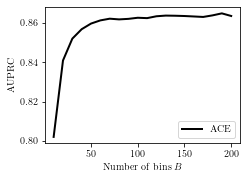

In [28]:
auc_values = {}

for d in datasets:
    f1_data = {}
    for s, dn in zip(strategies, display_names):
        folderPath = export_folder + s + '/'+ d + '/'
        result_content = loadmat(folderPath + 'result.mat')
        f0 = get_result_parts(result_content['data'][0][0])
        auc_values[dn] = f0['auprc'][0]

aucs = [auc_values[s][0] for s in display_names]

plt.figure(figsize=(3.5,2.5))
plt.plot(subset, aucs, linewidth=2, label='ACE', c='k')
plt.ylabel('AUPRC')
plt.xlabel('Number of bins $B$')
#plt.ylim([0.996, 0.999])
plt.legend(loc='lower right')
plt.savefig('fig/auprc_bin.pdf', bbox_inches='tight')

In [29]:
data =  pd.DataFrame(auc_values, index=['ST'])
data

10        20        30        40        50        60        70  \
ST  0.802019  0.840902  0.852019  0.856821  0.859684  0.861302  0.862167   

          80        90       100       110     120       130       140  \
ST  0.861809  0.862079  0.862642  0.862451  0.8634  0.863743  0.863668   

         150       160       170       180       190       200  
ST  0.863526  0.863296  0.863055  0.863849  0.864875  0.863545

In [30]:
print(data.to_latex(float_format='%.4f', bold_rows=True))

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &     10 &     20 &     30 &     40 &     50 &     60 &     70 &     80 &     90 &    100 &    110 &    120 &    130 &    140 &    150 &    160 &    170 &    180 &    190 &    200 \\
\midrule
\textbf{ST} & 0.8020 & 0.8409 & 0.8520 & 0.8568 & 0.8597 & 0.8613 & 0.8622 & 0.8618 & 0.8621 & 0.8626 & 0.8625 & 0.8634 & 0.8637 & 0.8637 & 0.8635 & 0.8633 & 0.8631 & 0.8638 & 0.8649 & 0.8635 \\
\bottomrule
\end{tabular}



In [32]:
export_folder = '../export_cv_runtime/'
datasets = [str(i*50) for i in range(1,8)]
strategies = ['ace_x2', 'ic_20', 'ic_50', 'te_20_2_2', 'te_50_2_2']
display_names = ['ACE', 'IC20', 'IC50', 'HOTE20', 'HOTE50']

ace_x2
[0.26245382, 1.2897046799999998, 3.7803213700000002, 7.01706757, 10.98608457, 16.6794409, 23.32903424]
ic_20
[0.20949174999999998, 1.0029050099999999, 7.3747327, 15.077564090000001, 27.18047748, 48.58466219, 88.90140525]
ic_50
[0.20328752, 3.01600142, 7.417669030000001, 14.810407699999999, 27.20893621, 48.42876994, 88.39913700000001]
te_20_2_2
[5.16876495, 6.440216869999999, 15.02798899, 26.333109439999998, 40.88069258, 60.059742729999996, 85.0236761]
te_50_2_2
[4.03387537, 16.55698401, 37.68484342000001, 66.88799522999999, 103.81076045, 154.30746960000002, 206.76533053999998]


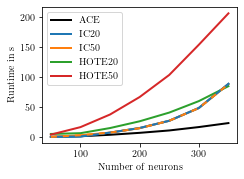

In [35]:
plt.figure(figsize=(3.5,2.5))
times = [50, 100, 150, 200, 250, 300, 350]
n_folds = 10
color_dict = {}
for s, dn in zip(strategies, display_names):
    runtimes_per_neuron = []
    for d in datasets:
        folderPath = export_folder + s + '/'+ d + '/'
        result_content = loadmat(folderPath + 'result.mat')
        fold_times = [get_result_parts(result_content['data'][0][i])['time'][0][0] for i in range(n_folds)]
        mean_fold_time = np.mean(fold_times)
        runtimes_per_neuron.append(mean_fold_time)
    print(s)
    print(runtimes_per_neuron)
    if dn == 'ACE':
        line = plt.plot(times[:len(runtimes_per_neuron)], runtimes_per_neuron, linewidth=2, label=dn, c='k')
    else:
        line = plt.plot(times[:len(runtimes_per_neuron)], runtimes_per_neuron, linewidth=2, label=dn)
    color_dict[s] = line[0].get_color()
for s, dn in zip(['ic_20', 'ic_50'],  ['IC20', 'IC50']):
    runtimes_per_neuron = []
    for d in datasets:
        folderPath = export_folder + s + '/'+ d + '/'
        result_content = loadmat(folderPath + 'result.mat')
        fold_times = [get_result_parts(result_content['data'][0][i])['time'][0][0] for i in range(n_folds)]
        mean_fold_time = np.mean(fold_times)
        runtimes_per_neuron.append(mean_fold_time)
    if dn == "IC50":
        plt.plot(times[:len(runtimes_per_neuron)], runtimes_per_neuron, '--', dashes=(3, 3), linewidth=2, c=color_dict[s])
    else:
        plt.plot(times[:len(runtimes_per_neuron)], runtimes_per_neuron, linewidth=2, c=color_dict[s])
plt.ylabel('Runtime in s')
plt.xlabel('Number of neurons')
plt.legend()
plt.savefig('fig/runtime.pdf', bbox_inches='tight')

In [36]:
export_folder = '../export_cv/'
datasets = ['sim1_subset']
strategies = ['ace_x2', 'ic_20', 'ic_50', 'te_20_2_2', 'te_50_2_2']
display_names = ['ACE', 'IC20', 'IC50', 'HOTE20', 'HOTE50']

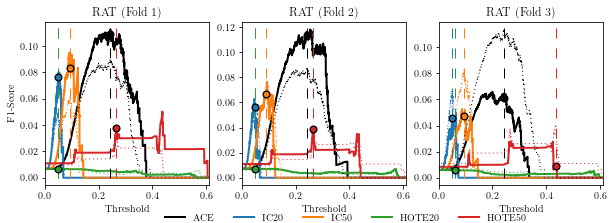

In [40]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
thresholds = np.linspace(0,1,10000,endpoint=True)
for f in range(3):
    for d in datasets:
        f1_data = {}
        for i, (s, dn) in enumerate(zip(strategies, display_names)):
            folderPath = export_folder + s + '/'+ d + '/'
            result_content = loadmat(folderPath + 'result.mat')
            resultCV_content = loadmat(folderPath + 'resultCV.mat')

            f0 = get_result_parts(result_content['data'][0][0])
            f1 = get_result_parts(result_content['data'][0][1])
            f2 = get_result_parts(result_content['data'][0][2])
            
            f0CV = get_resultCV_parts(resultCV_content['foldData'][0][0])
            f1CV = get_resultCV_parts(resultCV_content['foldData'][0][1])
            f2CV = get_resultCV_parts(resultCV_content['foldData'][0][2])

            f1_curves = [f0CV['f1Values'],f1CV['f1Values'],f2CV['f1Values']]
            f1_pos = [f0CV['f1Pos'][0][0],f1CV['f1Pos'][0][0],f2CV['f1Pos'][0][0]]

            f1_curve_f = np.squeeze(f1_curves[f])
            f1_pos_f = f1_pos[f] - 1
            
            mean_f1_test_curve = np.squeeze(np.sum(f1_curves, axis=0) - f1_curve_f)/2
            
            if f > 0:
                dn = None
                
            if s == "ace_x2":
                f1_line = axes[f].plot(thresholds, f1_curve_f, linewidth=2, label=dn, linestyle='-', zorder=0, c='k')
            else:
                f1_line = axes[f].plot(thresholds, f1_curve_f, linewidth=2, label=dn, linestyle='-', zorder=0)
            f1_mean_line = axes[f].plot(thresholds, mean_f1_test_curve, linewidth=1, label=None, linestyle=':', color=f1_line[0].get_color(), zorder=1, dashes=(1, 3))
            f1_dot = axes[f].scatter(f1_pos_f/10000, f1_curve_f[f1_pos_f], 200, marker='.', color='k', zorder=2)
            f1_dot = axes[f].scatter(f1_pos_f/10000, f1_curve_f[f1_pos_f], 80, marker='.', color=f1_line[0].get_color(), zorder=3)
            curr_ylim = axes[f].get_ylim()
            f1_dot_line = axes[f].plot([f1_pos_f/10000, f1_pos_f/10000], [0, 1], linewidth=1, label=None, linestyle='--', color=f1_line[0].get_color(), zorder=0.6, dashes=(10, 10))
            axes[f].set_ylim(curr_ylim)
            #plt.plot(thresholds, np.squeeze(f1_curves[0]), linewidth=2, color=color[i])
            #plt.plot(thresholds, np.squeeze(f1_curves[1]), linewidth=2, color=color[i])
            #plt.plot(thresholds, np.squeeze(f1_curves[2]), linewidth=2, label=dn, color=color[i])
    axes[f].set_title('RAT (Fold ' + str(f+1) + ')')
    if f == 0:
        axes[f].set_ylabel('F1-Score')
    axes[f].set_xlabel('Threshold')
    axes[f].set_xlim([0, 0.61])
    #axes[f].legend()
#fig.suptitle('F1-values for each fold', fontweight='bold', fontsize=15)
fig.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.48, -0.04), frameon=False)
fig.savefig('fig/threshold_f1.pdf', bbox_inches='tight', pad_inches=0.3)